### This data set represents a motor test and each column is a particular parameter. It is a time series data, where at the end the motor has a failure.
### In this case, the data set is normalized and the variables's names are numbers.
### The goal of this analysis is to try to find a way to detect abnormal behavior before failure occurs.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Loading the dataset

df = pd.read_csv("data.csv")
df

,0,1,2,3,4,5,6,7
0,-0.838011,-0.261733,-0.713395,0.685633,-0.544464,0.795241,-1.277298,-0.158133
1,-0.258688,-0.847925,-0.668514,0.246005,-0.019058,0.633774,-1.203832,-0.218024
2,-0.258688,-0.847925,-0.668514,0.246005,-0.019058,0.633774,-1.368839,-0.155638
3,0.037978,-0.212128,-0.522086,0.279646,-0.106725,0.693843,-1.312104,-0.218024
4,-0.588762,-0.587129,-0.070302,0.203360,-0.272989,0.802272,-1.338845,-0.250465
...,...,...,...,...,...,...,...,...
5177,0.397392,1.257242,1.689032,0.276354,0.525692,0.976580,0.669665,0.571788
5178,-0.085902,1.816711,0.881117,1.277464,0.015682,0.695883,1.034896,0.578026
5179,2.537860,1.637944,0.238290,0.502476,0.941472,1.013418,0.746683,0.563054
5180,1.341020,1.217198,-0.260495,0.158011,0.843211,0.699250,0.710428,0.571788


In [3]:
# Creating de moving average of each column to get less noisy data

df_MM = pd.DataFrame()

for i in df.columns:
    df_MM[i] = df[i].rolling(window=200).mean().shift(1)

# Dropping NaN values at the beginnig of the dataset, generated by de moving average

df_MM = df_MM.dropna()

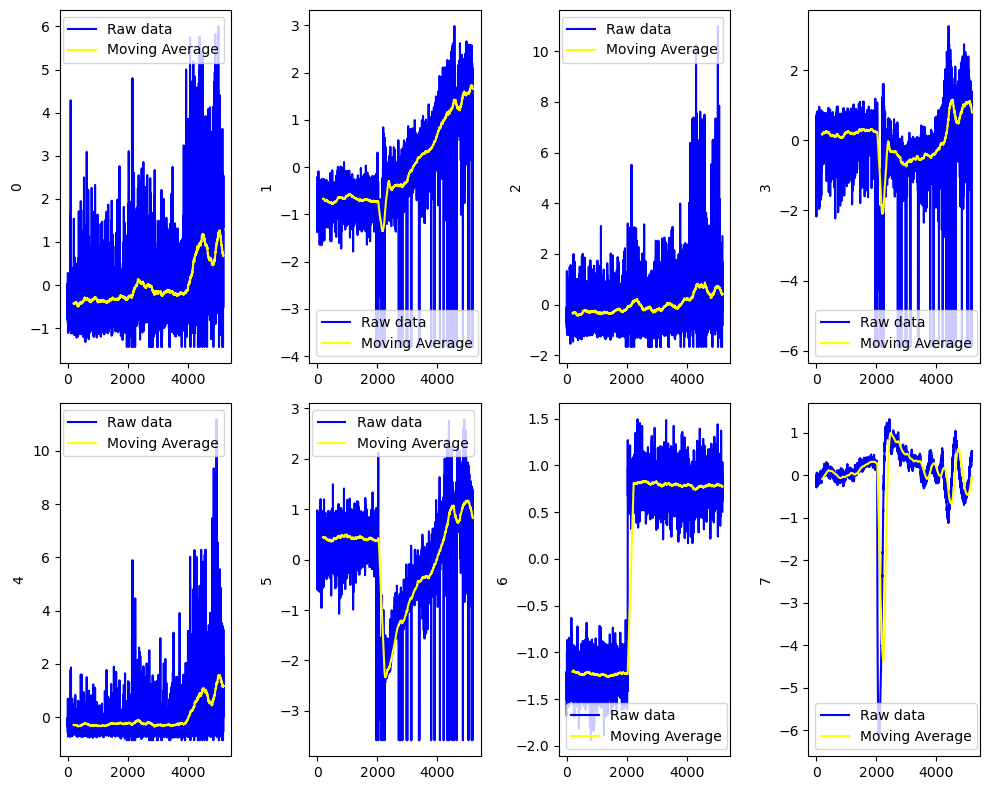

In [4]:
# Some plotting to visualize the data and to identify the different parts of the dataset

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 8))


sns.lineplot(data=df["0"], ax=axes[0, 0], color='blue', label='Raw data')
sns.lineplot(data=df_MM["0"], ax=axes[0, 0], color='yellow', label='Moving Average')

sns.lineplot(data=df["1"], ax=axes[0, 1], color='blue', label='Raw data')
sns.lineplot(data=df_MM["1"], ax=axes[0, 1], color='yellow', label='Moving Average')

sns.lineplot(data=df["2"], ax=axes[0, 2], color='blue', label='Raw data')
sns.lineplot(data=df_MM["2"], ax=axes[0, 2], color='yellow', label='Moving Average')

sns.lineplot(data=df["3"], ax=axes[0, 3], color='blue', label='Raw data')
sns.lineplot(data=df_MM["3"], ax=axes[0, 3], color='yellow', label='Moving Average')

sns.lineplot(data=df["4"], ax=axes[1, 0], color='blue', label='Raw data')
sns.lineplot(data=df_MM["4"], ax=axes[1, 0], color='yellow', label='Moving Average')
                     
sns.lineplot(data=df["5"], ax=axes[1, 1], color='blue', label='Raw data')
sns.lineplot(data=df_MM["5"], ax=axes[1, 1], color='yellow', label='Moving Average')

sns.lineplot(data=df["6"], ax=axes[1, 2], color='blue', label='Raw data')
sns.lineplot(data=df_MM["6"], ax=axes[1, 2], color='yellow', label='Moving Average')
                     
sns.lineplot(data=df["7"], ax=axes[1, 3], color='blue', label='Raw data')
sns.lineplot(data=df_MM["7"], ax=axes[1, 3], color='yellow', label='Moving Average')

plt.tight_layout()
plt.show()

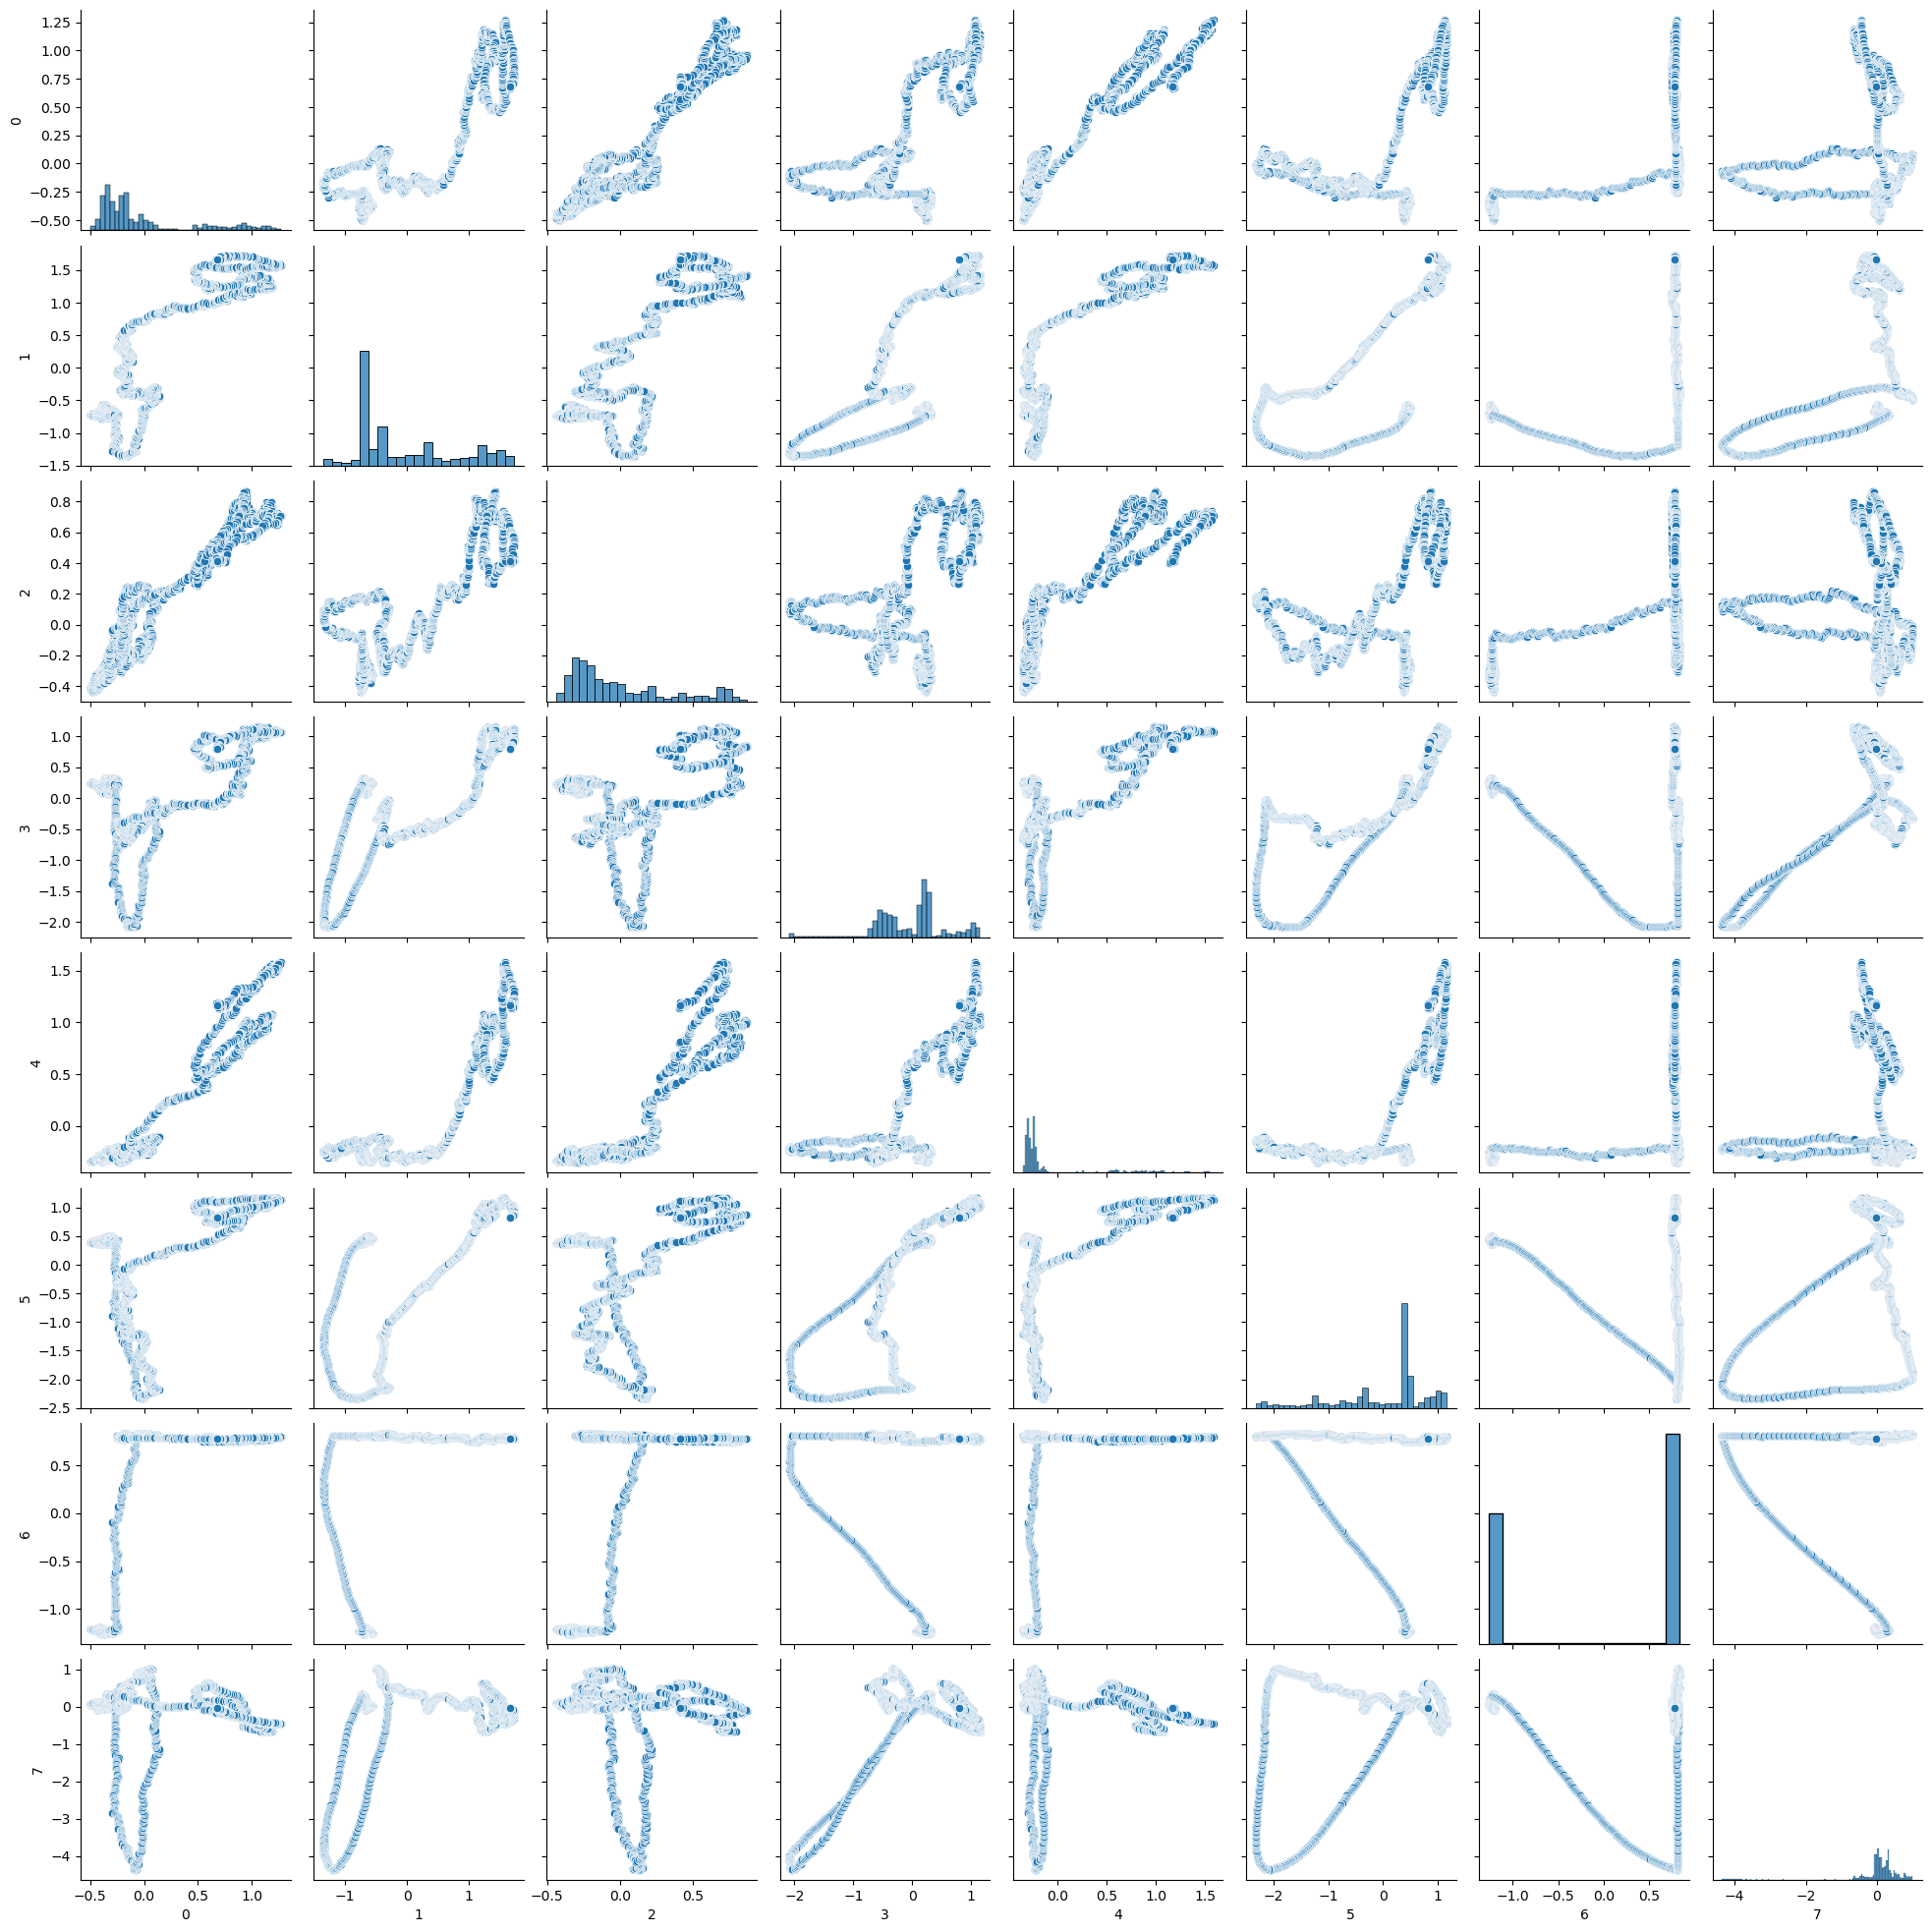

In [5]:
# Some plotting to visualize the data and the correlatoin between all the variables

sns.pairplot(data = df_MM)

In [6]:
# Filtering the time window I want to analyze

df_MM = df_MM.iloc[:5000]
df_MM = df_MM.reset_index(drop=True)
df_MM

,0,1,2,3,4,5,6,7
0,-0.427156,-0.674640,-0.328584,0.166673,-0.291364,0.442516,-1.207465,-0.084773
1,-0.424518,-0.676912,-0.329196,0.167199,-0.291329,0.440661,-1.207600,-0.083687
2,-0.424776,-0.676252,-0.330032,0.169922,-0.293921,0.439613,-1.207975,-0.082371
3,-0.424757,-0.673938,-0.330440,0.171150,-0.294656,0.438662,-1.207092,-0.081055
4,-0.426222,-0.674802,-0.331580,0.172209,-0.294953,0.437412,-1.206174,-0.079807
...,...,...,...,...,...,...,...,...
4977,0.679096,1.662493,0.413574,0.807455,1.190529,0.835957,0.775260,-0.041882
4978,0.679281,1.660059,0.424535,0.800291,1.188977,0.831951,0.774630,-0.037646
4979,0.673612,1.659419,0.432493,0.800701,1.184787,0.831015,0.776006,-0.033285
4980,0.679339,1.661794,0.416144,0.800761,1.173202,0.828773,0.775954,-0.028644


In [7]:
# Adding our target column "y", where 1 represents the abnoramal behavior

df_MM['y'] = np.zeros(len(df_MM))

for i in range(len(df_MM)):
    if i > 4000:
        df_MM.at[i,'y'] = 1
    else:
        df_MM.at[i,'y'] = 0

# Maping column "y"
maping = {0: "OK", 1 : "Alert"}
df_MM['y_map'] = df_MM['y'].map(maping)       
        
df_MM  

,0,1,2,3,4,5,6,7,y,y_map
0,-0.427156,-0.674640,-0.328584,0.166673,-0.291364,0.442516,-1.207465,-0.084773,0.0,OK
1,-0.424518,-0.676912,-0.329196,0.167199,-0.291329,0.440661,-1.207600,-0.083687,0.0,OK
2,-0.424776,-0.676252,-0.330032,0.169922,-0.293921,0.439613,-1.207975,-0.082371,0.0,OK
3,-0.424757,-0.673938,-0.330440,0.171150,-0.294656,0.438662,-1.207092,-0.081055,0.0,OK
4,-0.426222,-0.674802,-0.331580,0.172209,-0.294953,0.437412,-1.206174,-0.079807,0.0,OK
...,...,...,...,...,...,...,...,...,...,...
4977,0.679096,1.662493,0.413574,0.807455,1.190529,0.835957,0.775260,-0.041882,1.0,Alert
4978,0.679281,1.660059,0.424535,0.800291,1.188977,0.831951,0.774630,-0.037646,1.0,Alert
4979,0.673612,1.659419,0.432493,0.800701,1.184787,0.831015,0.776006,-0.033285,1.0,Alert
4980,0.679339,1.661794,0.416144,0.800761,1.173202,0.828773,0.775954,-0.028644,1.0,Alert


In [8]:
# Separating data

X = df_MM.drop(columns = ["y","y_map","6","7"])
y = df_MM["y"]

# Standardizing the dataset

#In this case, our dataset is already standardized. In case we need to standardize, we can use the following lines:

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

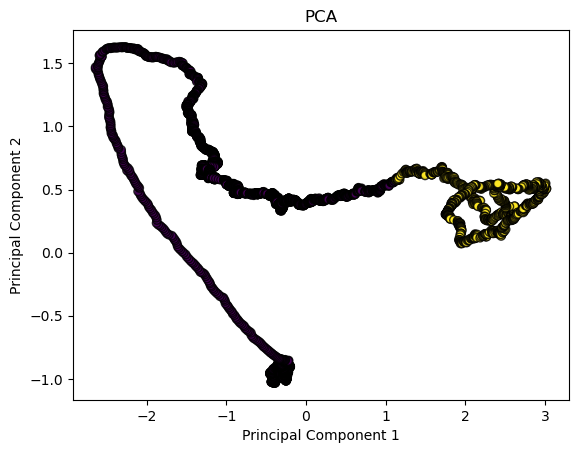

In [9]:
# Applying PCA method

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
X_pca

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [10]:
X_pca

array([[-0.33323884, -0.96390117],
       [-0.33465576, -0.96328777],
       [-0.33497924, -0.96390661],
       ...,
       [ 2.41729444,  0.54763721],
       [ 2.41167546,  0.54565468],
       [ 2.40501652,  0.54685501]])

Explained variance 1:  0.68 % 
Explained variance 2:  0.3 %

Accumulated variance:  0.93 %


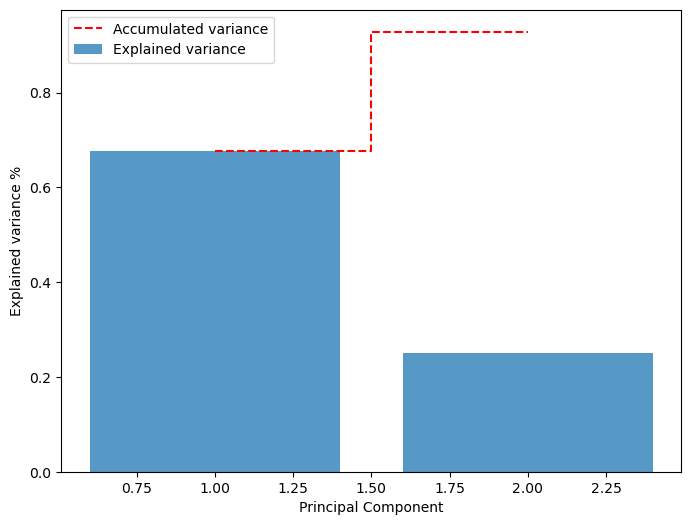

In [11]:
# Obtaining the explained variance for each principal component

explained_variance = pca.explained_variance_ratio_
print("Explained variance 1: ",round(explained_variance[0],2),"%","\nExplained variance 2: ",round(explained_variance[1],1),"%")

# Obtaining the acumulated variance explained

accumulated_variance = np.cumsum(explained_variance)
print("\nAccumulated variance: ",round(accumulated_variance[1],2),"%")

# Plotting

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.75, align='center', label='Explained variance')
plt.step(range(1, len(accumulated_variance) + 1), accumulated_variance, where='mid', label='Accumulated variance', color='red', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained variance %')
plt.legend()
plt.show()

C:\Users\etesting\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


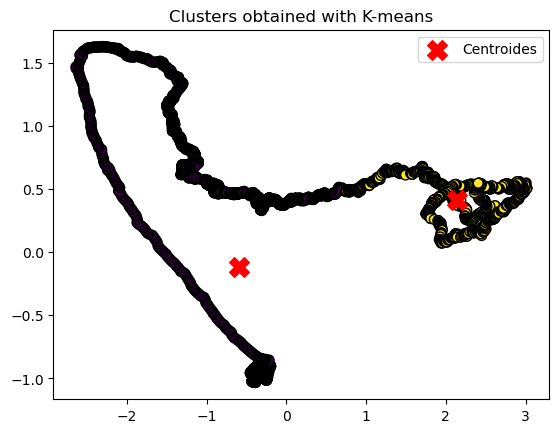

In [12]:
# Applying K-means with PCA

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Obtaining cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, marker='o', edgecolors='black', s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title('Clusters obtained with K-means')
plt.legend()
plt.show()

In [13]:
centroids

array([[-0.59025066, -0.11490617],
       [ 2.14267574,  0.41712221]])

In [14]:
# Creating a new dataframe with PCA and Kmeans results

df_PCA_Kmeans = df_MM.copy()

df_PCA_Kmeans['PCA_1'] = X_pca[:,0]
df_PCA_Kmeans['PCA_2'] = X_pca[:,1]
df_PCA_Kmeans['labels_Kmeans'] = labels

In [15]:
df_PCA_Kmeans

,0,1,2,3,4,5,6,7,y,y_map,PCA_1,PCA_2,labels_Kmeans
0,-0.427156,-0.674640,-0.328584,0.166673,-0.291364,0.442516,-1.207465,-0.084773,0.0,OK,-0.333239,-0.963901,0
1,-0.424518,-0.676912,-0.329196,0.167199,-0.291329,0.440661,-1.207600,-0.083687,0.0,OK,-0.334656,-0.963288,0
2,-0.424776,-0.676252,-0.330032,0.169922,-0.293921,0.439613,-1.207975,-0.082371,0.0,OK,-0.334979,-0.963907,0
3,-0.424757,-0.673938,-0.330440,0.171150,-0.294656,0.438662,-1.207092,-0.081055,0.0,OK,-0.334073,-0.962738,0
4,-0.426222,-0.674802,-0.331580,0.172209,-0.294953,0.437412,-1.206174,-0.079807,0.0,OK,-0.335604,-0.963434,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4977,0.679096,1.662493,0.413574,0.807455,1.190529,0.835957,0.775260,-0.041882,1.0,Alert,2.423922,0.541758,1
4978,0.679281,1.660059,0.424535,0.800291,1.188977,0.831951,0.774630,-0.037646,1.0,Alert,2.419475,0.548001,1
4979,0.673612,1.659419,0.432493,0.800701,1.184787,0.831015,0.776006,-0.033285,1.0,Alert,2.417294,0.547637,1
4980,0.679339,1.661794,0.416144,0.800761,1.173202,0.828773,0.775954,-0.028644,1.0,Alert,2.411675,0.545655,1


In [26]:
# Maping column "labels_Kmeans"
maping = {0: "OK", 1 : "Alert"}
df_PCA_Kmeans['labels_Kmeans_map'] = df_PCA_Kmeans['labels_Kmeans'].map(maping) 
df_PCA_Kmeans

,0,1,2,3,4,5,6,7,y,y_map,PCA_1,PCA_2,labels_Kmeans,labels_Kmeans_map
0,-0.427156,-0.674640,-0.328584,0.166673,-0.291364,0.442516,-1.207465,-0.084773,0.0,OK,-0.333239,-0.963901,0,OK
1,-0.424518,-0.676912,-0.329196,0.167199,-0.291329,0.440661,-1.207600,-0.083687,0.0,OK,-0.334656,-0.963288,0,OK
2,-0.424776,-0.676252,-0.330032,0.169922,-0.293921,0.439613,-1.207975,-0.082371,0.0,OK,-0.334979,-0.963907,0,OK
3,-0.424757,-0.673938,-0.330440,0.171150,-0.294656,0.438662,-1.207092,-0.081055,0.0,OK,-0.334073,-0.962738,0,OK
4,-0.426222,-0.674802,-0.331580,0.172209,-0.294953,0.437412,-1.206174,-0.079807,0.0,OK,-0.335604,-0.963434,0,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4977,0.679096,1.662493,0.413574,0.807455,1.190529,0.835957,0.775260,-0.041882,1.0,Alert,2.423922,0.541758,1,Alert
4978,0.679281,1.660059,0.424535,0.800291,1.188977,0.831951,0.774630,-0.037646,1.0,Alert,2.419475,0.548001,1,Alert
4979,0.673612,1.659419,0.432493,0.800701,1.184787,0.831015,0.776006,-0.033285,1.0,Alert,2.417294,0.547637,1,Alert
4980,0.679339,1.661794,0.416144,0.800761,1.173202,0.828773,0.775954,-0.028644,1.0,Alert,2.411675,0.545655,1,Alert


<Axes: xlabel='y_map', ylabel='count'>

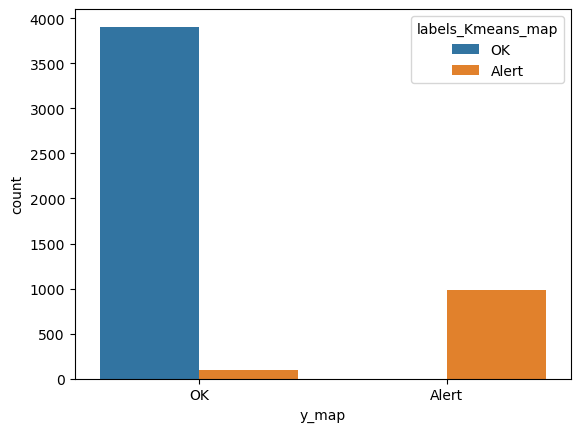

In [27]:
# Plotting the results, comparing the target I added (y) with the labels generated by Kmeans

sns.countplot(x = df_PCA_Kmeans['y_map'], hue = df_PCA_Kmeans['labels_Kmeans_map'])

In [28]:
# Applying K-means without PCA

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X) # here I use the complete dataset

# Obtaining cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\etesting\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [30]:
# Creating a new dataframe with Kmeans results

df_Kmeans = df_MM.copy()

df_Kmeans['labels_Kmeans'] = labels

In [31]:
df_Kmeans

,0,1,2,3,4,5,6,7,y,y_map,labels_Kmeans
0,-0.427156,-0.674640,-0.328584,0.166673,-0.291364,0.442516,-1.207465,-0.084773,0.0,OK,0
1,-0.424518,-0.676912,-0.329196,0.167199,-0.291329,0.440661,-1.207600,-0.083687,0.0,OK,0
2,-0.424776,-0.676252,-0.330032,0.169922,-0.293921,0.439613,-1.207975,-0.082371,0.0,OK,0
3,-0.424757,-0.673938,-0.330440,0.171150,-0.294656,0.438662,-1.207092,-0.081055,0.0,OK,0
4,-0.426222,-0.674802,-0.331580,0.172209,-0.294953,0.437412,-1.206174,-0.079807,0.0,OK,0
...,...,...,...,...,...,...,...,...,...,...,...
4977,0.679096,1.662493,0.413574,0.807455,1.190529,0.835957,0.775260,-0.041882,1.0,Alert,1
4978,0.679281,1.660059,0.424535,0.800291,1.188977,0.831951,0.774630,-0.037646,1.0,Alert,1
4979,0.673612,1.659419,0.432493,0.800701,1.184787,0.831015,0.776006,-0.033285,1.0,Alert,1
4980,0.679339,1.661794,0.416144,0.800761,1.173202,0.828773,0.775954,-0.028644,1.0,Alert,1


In [32]:
# Maping column "labels_Kmeans"
maping = {0: "Alert", 1 : "OK"}
df_PCA_Kmeans['labels_Kmeans_map'] = df_PCA_Kmeans['labels_Kmeans'].map(maping) 

<Axes: xlabel='y_map', ylabel='count'>

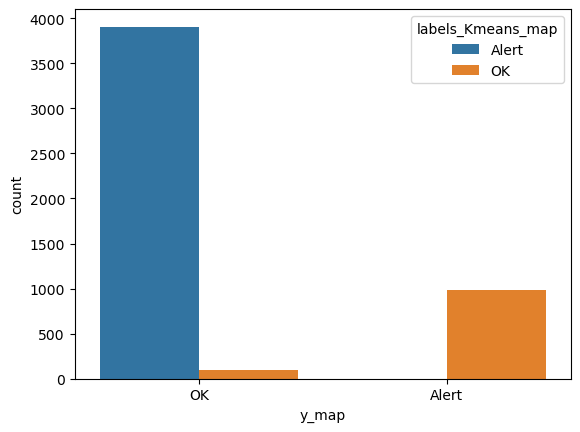

In [33]:
# Plotting the results, comparing the target I added (y) with the labels generated by Kmeans

sns.countplot(x = df_PCA_Kmeans['y_map'], hue = df_PCA_Kmeans['labels_Kmeans_map'])

In [34]:
df_PCA_Kmeans['y_map'].value_counts()

OK       4001
Alert     981
Name: y_map, dtype: int64

In [35]:
df_PCA_Kmeans['labels_Kmeans_map'].value_counts()

Alert    3906
OK       1076
Name: labels_Kmeans_map, dtype: int64